## Import data and visualize it

In [1]:
# initial data
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

Text(0.5, 1.0, 'X and Y scatter plot')

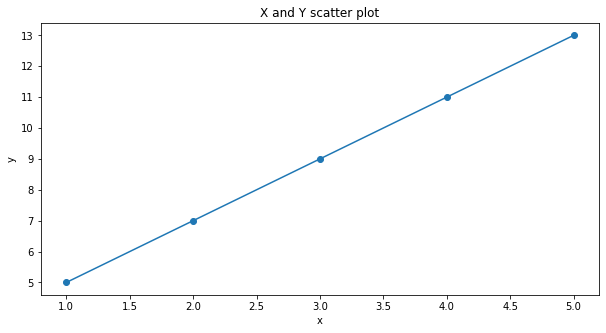

In [19]:
# plot data
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.scatter(x, y)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('X and Y scatter plot')

## Cost function for the linear regression

A function in the linear regression is defined as $y = kx + b$

In [70]:
# cost function
def cost_linear(x,y,k,b):
    """
    x and y are arrays
    """    
   
    # find how many samples
    n = np.shape(x)[0]
    
    # define function
    cost = 1/n * np.sum( np.square((k*x+b) - y) )

    return cost

Find slope and the constant by taking the first dataset and the last

In [71]:
last = len(x) - 1
slope = (y[last]-y[0]) / (x[last]-x[0])
constant = y[last] - slope*x[last]
print('slope {} and constant {}'.format(slope,constant))

slope 2.0 and constant 3.0


Test for cost_linear function

In [72]:
cost_linear(x,y,slope,constant)

0.0

Visualize cost function for slope

Text(0, 0.5, 'cost function value')

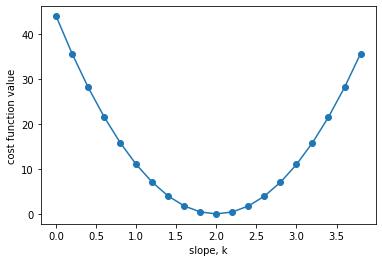

In [110]:
k = np.arange(0., 4., 0.2)
b = 3
z = np.empty_like(k)

for i in range(len(k)):
    
    # redefine z values
    z[i] = cost_linear(x, y, k[i], b)

plt.scatter(k, z)
plt.plot(k,z)
plt.xlabel('slope, k')
plt.ylabel('cost function value')

## Fixed step for finding minimums

Fixed step algorithm when b is known

In [219]:
def fixed_step_k(x,y,k,b=3,step=10000, cost_error = 1e-06):
        
        k = np.linspace(0.,10.,num=step)
        
        for i in range(len(k)):
            cost = cost_linear(x,y,k[i],b)
            if cost <= cost_error:
                print('k is {}, cost function is {}'
                          .format( round( k[i],3 ), np.format_float_scientific(cost) ) )

Definitely need meshgrid here

In [220]:
fixed_step_k(x,y,k,b=3,cost_error=1e-05)

k is 1.999, cost function is 7.0414082112298495e-06
k is 2.0, cost function is 4.4008801320092406e-07


## Gradient descent for finding minimums

In [190]:
def grad_descent(x,y,iterations=1000, learning_rate=0.05, cost_error=1e-09):
    
    # define k, b, n
    k_curr = b_curr = 1
    n = len(x)
    
    for i in range(iterations):
        # print(k_curr, b_curr)
        y_predicted = k_curr * x + b_curr
        md = - (2/n)*sum(x*(y-y_predicted))
        bd = - (2/n)*sum(y-y_predicted)
        k_curr = k_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        cost = cost_linear(x, y, k_curr, b_curr)
        
        print('m {}, b {}, cost {}, iteration {}'.
              format( round(k_curr,2), round(b_curr,2), np.format_float_scientific(cost, precision=2), i) )
        
        # breal from the loop if cost_error is reached
        if cost <= cost_error:
            break

In [191]:
grad_descent(x, y)

m 2.7, b 1.5, cost 1.34e+00, iteration 0
m 2.38, b 1.44, cost 4.65e-01, iteration 1
m 2.43, b 1.48, cost 4.22e-01, iteration 2
m 2.41, b 1.5, cost 4.07e-01, iteration 3
m 2.41, b 1.53, cost 3.93e-01, iteration 4
m 2.4, b 1.56, cost 3.8e-01, iteration 5
m 2.39, b 1.58, cost 3.67e-01, iteration 6
m 2.39, b 1.6, cost 3.55e-01, iteration 7
m 2.38, b 1.63, cost 3.43e-01, iteration 8
m 2.37, b 1.65, cost 3.31e-01, iteration 9
m 2.37, b 1.67, cost 3.20e-01, iteration 10
m 2.36, b 1.7, cost 3.1e-01, iteration 11
m 2.36, b 1.72, cost 2.99e-01, iteration 12
m 2.35, b 1.74, cost 2.89e-01, iteration 13
m 2.34, b 1.76, cost 2.79e-01, iteration 14
m 2.34, b 1.78, cost 2.70e-01, iteration 15
m 2.33, b 1.8, cost 2.61e-01, iteration 16
m 2.33, b 1.82, cost 2.52e-01, iteration 17
m 2.32, b 1.84, cost 2.44e-01, iteration 18
m 2.32, b 1.86, cost 2.36e-01, iteration 19
m 2.31, b 1.88, cost 2.28e-01, iteration 20
m 2.3, b 1.9, cost 2.20e-01, iteration 21
m 2.3, b 1.92, cost 2.13e-01, iteration 22
m 2.29, b 